### Some spells

In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt

### Parameters

In [2]:
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
RANDOM_SEED = 42
TEST_SET_FRACTION = 0.33
NUMBER_OF_TOP_WORDS = -100

### Sample Data - load and exploe data

In [3]:
twenty_train = fetch_20newsgroups(subset='all',
    categories=categories, shuffle=True, random_state=RANDOM_SEED)

In [4]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [5]:
print(f'Total of {len(twenty_train.filenames)} files')
print("\n".join(twenty_train.data[0].split("\n")[:3]))
print(twenty_train.target_names[twenty_train.target[0]])


Total of 3759 files
From: geb@cs.pitt.edu (Gordon Banks)
Subject: Re: "CAN'T BREATHE"
Article-I.D.: pitt.19440
sci.med


In [6]:
twenty_train.target[:10]

array([2, 3, 3, 1, 2, 3, 2, 1, 1, 1])

In [7]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

sci.med
soc.religion.christian
soc.religion.christian
comp.graphics
sci.med
soc.religion.christian
sci.med
comp.graphics
comp.graphics
comp.graphics


### Train / Test (Overfit)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    twenty_train.data, twenty_train.target, test_size=TEST_SET_FRACTION, random_state=RANDOM_SEED)

In [9]:
print(f'We have {len(X_train)} training documents and {len(X_test)} in the test set')

We have 2518 training documents and 1241 in the test set


### Basic Test Pipeline: one hot vector , TF/DF , Naive Bayes

In [10]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [11]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [12]:
count_vect = text_clf[0]
clf        = text_clf[2]

In [13]:
count_vect.vocabulary_.get(u'algorithm')

5353

In [14]:
docs_new = ['God is love', 'OpenGL on the GPU is fast','disease disease disease disease disease']

predicted = text_clf.predict(docs_new)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))


'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics
'disease disease disease disease disease' => sci.med


### Confusion Matrix

Confusion matrix, without normalization
[[202   0   3  76]
 [  1 304   1  18]
 [  0   5 299  22]
 [  0   2   2 306]]
Normalized confusion matrix
[[0.72 0.   0.01 0.27]
 [0.   0.94 0.   0.06]
 [0.   0.02 0.92 0.07]
 [0.   0.01 0.01 0.99]]


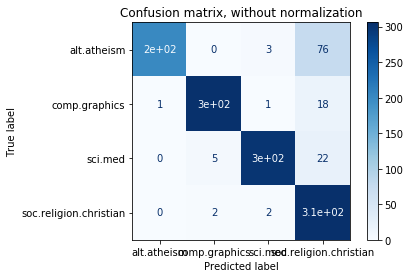

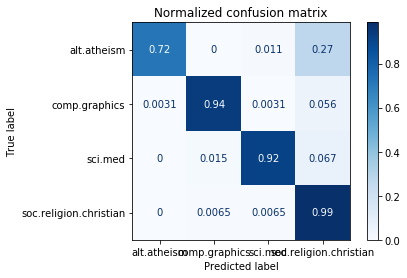

In [15]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(text_clf, X_test, y_test,
                                 display_labels=twenty_train.target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


### Show the feature

In [16]:
for i,c in enumerate(twenty_train.target_names):
    print(c)
    threshold = sorted(list(text_clf[2].coef_[i]))[NUMBER_OF_TOP_WORDS]
    revdict = dict((count_vect.vocabulary_[k],k) for k in iter(count_vect.vocabulary_))
    print([revdict[i] for i,x in enumerate(clf.coef_[i]) if x>threshold])

alt.atheism
['about', 'all', 'an', 'and', 'any', 'are', 'article', 'as', 'at', 'atheism', 'atheists', 'be', 'because', 'believe', 'bill', 'but', 'by', 'caltech', 'can', 'com', 'cs', 'cwru', 'do', 'does', 'don', 'edu', 'for', 'from', 'god', 'has', 'have', 'he', 'his', 'host', 'how', 'if', 'in', 'is', 'islam', 'islamic', 'it', 'jon', 'just', 'keith', 'like', 'lines', 'livesey', 'mathew', 'me', 'moral', 'morality', 'more', 'my', 'nntp', 'no', 'not', 'of', 'on', 'one', 'only', 'or', 'organization', 'other', 'people', 'posting', 're', 'religion', 'sandvik', 'say', 'sgi', 'so', 'solntze', 'some', 'subject', 'than', 'that', 'the', 'their', 'then', 'there', 'they', 'think', 'this', 'to', 'uk', 'was', 'we', 'were', 'what', 'which', 'who', 'why', 'will', 'with', 'would', 'wpd', 'writes', 'you', 'your']
comp.graphics
['24', '3d', 'about', 'ac', 'advance', 'all', 'am', 'an', 'and', 'any', 'anyone', 'are', 'as', 'at', 'be', 'bit', 'but', 'by', 'ca', 'can', 'code', 'color', 'com', 'comp', 'computer'

### REFS:

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html